<a href="https://colab.research.google.com/github/hooah26/Engineer_Big_Data_Analysis/blob/master/Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import seaborn as sns
import numpy as np
import pandas as pd
# sns.get_dataset_names()
df = sns.load_dataset('penguins')
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [29]:
df.isna().sum()
# df.info()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [30]:
#1. 결측치 제거 

In [31]:
df['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [32]:
missing = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

for i in missing :
  df[i] = df[i].fillna(df[i].median())

df['sex'] = df['sex'].fillna('Male')
df.isna().sum()



species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [33]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,Male
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,Female


In [34]:
from sklearn.preprocessing import LabelEncoder
label = ['species','island','sex']
df[label] = df[label].apply(LabelEncoder().fit_transform)

In [35]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


In [36]:
#3 . 데이터 변환, 더미 처리

In [37]:
import pandas as pd
category = ['island', 'sex']
for i in category :
  df[i] = df[i].astype('category')
df = pd.get_dummies(df)

In [38]:
df.head() 

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_0,island_1,island_2,sex_0,sex_1
0,0,39.10,18.7,181.0,3750.0,0,0,1,0,1
1,0,39.50,17.4,186.0,3800.0,0,0,1,1,0
2,0,40.30,18.0,195.0,3250.0,0,0,1,1,0
3,0,44.45,17.3,197.0,4050.0,0,0,1,0,1
4,0,36.70,19.3,193.0,3450.0,0,0,1,1,0


In [39]:
df['body_mass_g_q_cut']=pd.qcut(df['body_mass_g'], 5, labels=False)

In [40]:
df['body_mass_g_q_cut'].value_counts()

0    71
1    70
2    68
4    68
3    67
Name: body_mass_g_q_cut, dtype: int64

In [41]:
#5. scale 스케일 
from sklearn.preprocessing import MinMaxScaler
scaler = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
min  = MinMaxScaler()
min.fit(df[scaler])
df[scaler]= min.transform(df[scaler])

In [42]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_0,island_1,island_2,sex_0,sex_1,body_mass_g_q_cut
0,0,0.254545,0.666667,0.152542,0.291667,0,0,1,0,1,1
1,0,0.269091,0.511905,0.237288,0.305556,0,0,1,1,0,1
2,0,0.298182,0.583333,0.389831,0.152778,0,0,1,1,0,0
3,0,0.449091,0.500000,0.423729,0.375000,0,0,1,0,1,2
4,0,0.167273,0.738095,0.355932,0.208333,0,0,1,1,0,0


In [43]:
#6.데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['species'], test_size=0.2, stratify=df['species'], random_state=1)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(275, 10)
(69, 10)
(275,)
(69,)


In [45]:
#7. 모형 학습
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)

In [46]:
from sklearn.ensemble import AdaBoostClassifier
model2 = AdaBoostClassifier()
model2.fit(X_train, y_train)
pred2 =  model2.predict(X_test)

In [47]:
#8. 앙상블
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('rf', model1),('ad',model2)], voting='hard')
clf.fit(X_train, y_train)
pred3 = clf.predict(X_test)

In [48]:
pred3

array([0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0,
       2, 0, 1])

In [49]:
#9 모델평가
from sklearn.metrics import accuracy_score
print('랜포 정확도', accuracy_score(y_test, pred1))
print('에디다 정확도', accuracy_score(y_test, pred2))
print('보팅 정확도', accuracy_score(y_test, pred3))

랜포 정확도 1.0
에디다 정확도 0.9855072463768116
보팅 정확도 1.0


In [50]:
#10. 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[50, 100], 'max_depth':[4,6]}
model4 = RandomForestClassifier()
clf = GridSearchCV(estimator=model4, param_grid=parameters, cv=3)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'max_depth': 6, 'n_estimators': 100}


In [51]:
#11. 예측값 저장
pd.DataFrame({'id':y_test.index, 'pred':pred3}).to_csv('00300.csv', index=False)

In [59]:
check = pd.read_csv('00300.csv')
check.head()

,id,pred
0,57,0
1,173,1
2,213,1
3,50,0
4,25,0


-48.3125 152.1875
0.0


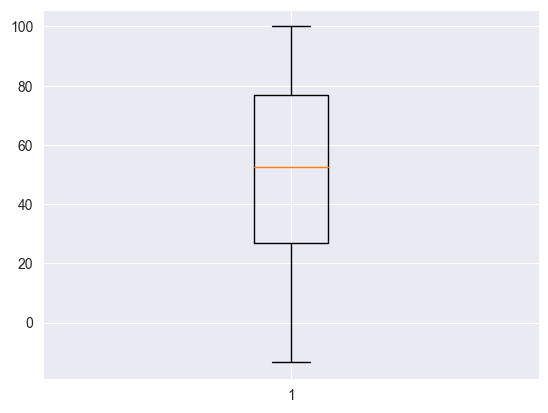

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./basic1.csv')
# print(df)

q1 = df['age'].quantile(.25)
q3 = df['age'].quantile(.75)
iqr = q3 - q1
min = q1 - iqr*1.5
max = q3 + iqr*1.5

print(min, max)
df_outlier = df[(df['age'] < min) | (df['age'] > max)]['age'].sum()
print(df_outlier)

plt.boxplot(df['age'])
plt.show()
